In [2]:
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
#Import csv file into notebook
url='https://raw.githubusercontent.com/ventdata/Fast-Food/master/fast-food-restaurants/Datafiniti_Fast_Food_Restaurants.csv'
data = pd.read_csv(url,sep=",") # use sep="," for coma separation. 
data.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [4]:
#Import state data
state_data = pd.read_csv('US_state_data.csv')
state_data.head()

,State,Square Miles (Land Area),Population
0,Alabama,50750,"4,849,000 (23rd)"
1,Alaska,570641,"737,000 (49th)"
2,Arizona,113642,"6,731,000 (15th)"
3,Arkansas,52075,"2,966,000 (33rd)"
4,California,155973,"38,803,000 (1st)"


In [5]:
#Create 2 new dataframes
mcD = "McDonald's"
McDonald = data.query("name == @mcD")
TacoBell = data.query("name == 'Taco Bell'")

In [6]:
McDonald.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
25,AVz7P6oa3D1zeR_xDIUp,2017-06-30T23:04:32Z,2018-06-25T09:29:45Z,1224 State St,Fast Food,Schenectady,US,us/ny/schenectady/1224statest/-1161002137,42.797920,-73.924364,McDonald's,12304,NY,https://foursquare.com/v/mcdonalds/4cc4687306c...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
26,AVzxltjJ3D1zeR_xCvkm,2017-06-29T02:03:33Z,2018-06-25T09:29:45Z,1232 Ulster Ave,Fast Food Restaurant,Kingston,US,us/ny/kingston/1232ulsterave/-1161002137,41.967079,-73.988583,McDonald's,12401,NY,https://foursquare.com/v/mcdonalds/4b9fcb19f96...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
27,AVzA1QA5-gnIPe8DScbz,2017-06-19T14:50:03Z,2018-06-25T09:29:44Z,1188 Avenue of The Americas,Fast Food Restaurant,New York,US,us/ny/newyork/1188avenueoftheamericas/-1161002137,40.757558,-73.981671,McDonald's,10036,NY,https://www.trip.com/new-york-city/restaurants...,http://mcdonalds.com/
28,AVzA2BSFFcQ3k02bBX5D,2017-06-19T14:53:25Z,2018-06-25T09:29:43Z,114 Delancey St,Fast Food Restaurant,New York,US,us/ny/newyork/114delanceyst/-1161002137,40.718943,-73.988306,McDonald's,10002,NY,https://www.allmenus.com/ny/new-york/188808-mc...,http://mcdonalds.com
29,AVzA1yfgFcQ3k02bBXsM,2017-06-19T14:52:24Z,2018-06-25T09:29:41Z,1050 Front St,Fast Food Restaurants,Uniondale,US,us/ny/uniondale/1050frontst/-1161002137,40.709646,-73.591453,McDonald's,11553,NY,https://www.yellowpages.com/uniondale-ny/mip/m...,"http://mcdonalds.com,http://www.mcdonalds.com/..."


In [7]:
TacoBell.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
53,AVwdZcGEkufWRAb55egc,2016-03-24T10:25:24Z,2018-06-25T09:28:10Z,1601 W Kirby St,Fast Food Restaurant and Mexican Restaurant,Wylie,US,us/tx/wylie/1601wkirbyst/-864103396,33.007329,-96.554127,Taco Bell,75098,TX,https://www.allmenus.com/tx/wylie/193638-taco-...,http://www.tacobell.com
54,AVwdDkuikufWRAb5118z,2016-06-20T17:25:26Z,2018-06-25T09:28:08Z,7425 S Broadway Ave,Fast Food Restaurant,Tyler,US,us/tx/tyler/7425sbroadwayave/-864103396,32.274786,-95.306757,Taco Bell,75703,TX,https://www.allmenus.com/tx/tyler/193617-taco-...,https://locations.tacobell.com/tx/tyler/7425-s...
127,AVwdRysRIN2L1WUfuIG0,2015-10-19T07:55:55Z,2018-06-25T08:58:44Z,865 S Main St,Fast Food Restaurant,Belle Glade,US,us/fl/belleglade/865smainst/-864103396,26.675110,-80.670000,Taco Bell,33430,FL,http://www.yellowbook.com/profile/taco-bell_14...,"http://www.tacobell.com,https://locations.taco..."
153,AVwcloWK_7pvs4fzww83,2016-11-14T02:12:19Z,2018-06-25T08:58:06Z,609 Naamans Rd,Fast Food Restaurants,Claymont,US,us/de/claymont/609naamansrd/-864103396,39.817180,-75.457150,Taco Bell,19703,DE,http://www.citysearch.com/profile/614151294/cl...,"http://www.tacobell.com,http://api.citygridmed..."


In [8]:
#Change State column in state data to abbreviations
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

state_data['state_abbrev'] = state_data['State'].map(us_state_abbrev)

In [9]:
#Check the result of abbreviating state name
state_data.head()

,State,Square Miles (Land Area),Population,state_abbrev
0,Alabama,50750,"4,849,000 (23rd)",AL
1,Alaska,570641,"737,000 (49th)",AK
2,Arizona,113642,"6,731,000 (15th)",AZ
3,Arkansas,52075,"2,966,000 (33rd)",AR
4,California,155973,"38,803,000 (1st)",CA


In [10]:
#Remove population rank from population column
state_data['Population'] = state_data['Population'].str.split('\s+(\S+)\s*').str[0]
state_data.head()

,State,Square Miles (Land Area),Population,state_abbrev
0,Alabama,50750,"4,849,000",AL
1,Alaska,570641,"737,000",AK
2,Arizona,113642,"6,731,000",AZ
3,Arkansas,52075,"2,966,000",AR
4,California,155973,"38,803,000",CA


In [11]:
#Replace , from population column and convert column to integer
state_data['Population'] = state_data['Population'].str.replace(",", "")
state_data['Population'] = state_data['Population'].astype(str).astype(int)
state_data.dtypes

State                       object
Square Miles (Land Area)     int64
Population                   int32
state_abbrev                object
dtype: object

In [12]:
#Join state_data with Mcdonald data
new_mcd = McDonald.join(state_data.set_index('state_abbrev'), on='province')

In [13]:
#Create new columns of mcd_per_sq_mile and mcd_per_capita
new_mcd['mcd_per_sq_mile'] = 1/new_mcd['Square Miles (Land Area)']
new_mcd['mcd_per_capita'] = 1/new_mcd['Population']

In [15]:
#Join state_data with Tacobell data
new_tacobell = TacoBell.join(state_data.set_index('state_abbrev'), on='province')

In [16]:
#Create new columns of tacobell_per_sq_mile and tacobell_per_capita
new_tacobell['tacobell_per_sq_mile'] = 1/new_tacobell['Square Miles (Land Area)']
new_tacobell['tacobell_per_capita'] = 1/new_tacobell['Population']

# VISUALIZATION

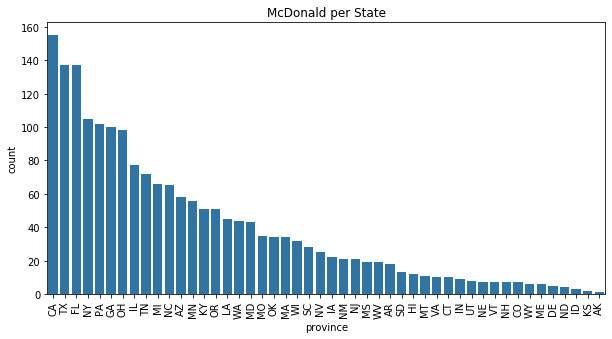

In [17]:
#State/province with the most Burger King
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
state_order = McDonald['province'].value_counts().index
sb.countplot(data = McDonald, x = 'province', color = base_color, order = state_order)
plt.xticks(rotation=90)
plt.title('McDonald per State');

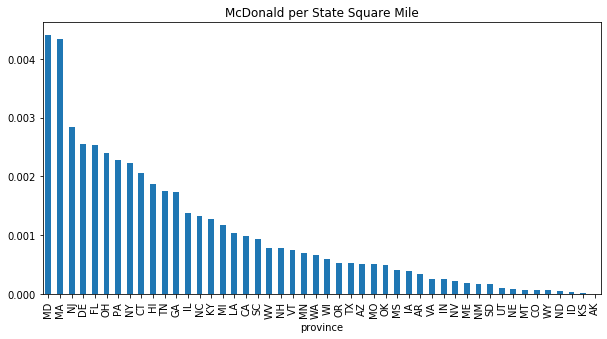

In [20]:
#Burger King per square mile area of each state
grouped_mcd_area = new_mcd.groupby('province')['mcd_per_sq_mile'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_mcd_area.plot.bar(color = base_color)
plt.title('McDonald per State Square Mile');

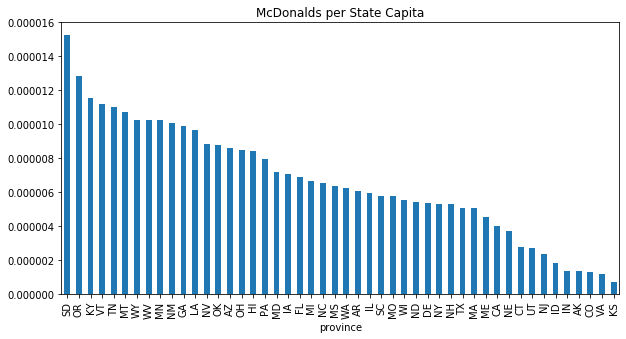

In [26]:
#Burger King per capita of each state
grouped_mcd_capita = new_mcd.groupby('province')['mcd_per_capita'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_mcd_capita.plot.bar(color = base_color)
plt.title('McDonalds per State Capita');

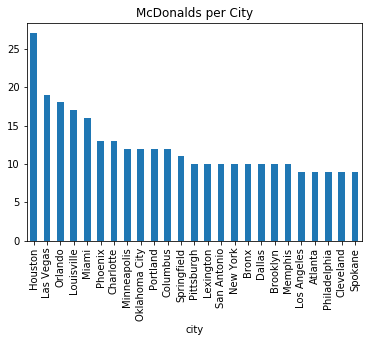

In [27]:
#City with the most Burger King
top_mcd_city = McDonald.groupby('city')['city'].count().sort_values(ascending = False).head(25)
top_mcd_city.plot.bar(color = base_color)
plt.title('McDonalds per City');

In [21]:
#Connect to Mapbox access token
mapbox_access_token='pk.eyJ1IjoibmF2ZWVuOTIiLCJhIjoiY2pqbWlybTc2MTlmdjNwcGJ2NGt1dDFoOSJ9.z5Jt4XxKvu5voCJZBAenjQ'

In [38]:
#Create US map with Burger King locations
mcd_lat = McDonald.latitude
mcd_lon = McDonald.longitude
mcd_city = McDonald.city

data = [
    go.Scattermapbox(
        lat=mcd_lat,
        lon=mcd_lon,
        mode='markers',
        marker=dict(
            size=5,
            color='rgb(255,150, 0)',
            opacity=0.8
        ))]
layout = go.Layout(
    title='McDonalds Restaurants',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='McDonald Restaurants')

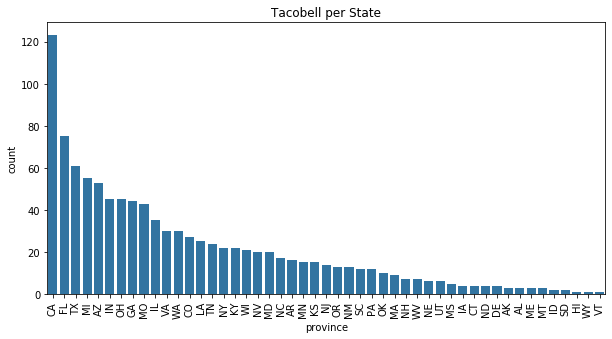

In [29]:
#State/province with the most Tacobell
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
state_order_taco = TacoBell['province'].value_counts().index
sb.countplot(data = TacoBell, x = 'province', color = base_color, order = state_order_taco)
plt.xticks(rotation=90)
plt.title('Tacobell per State');

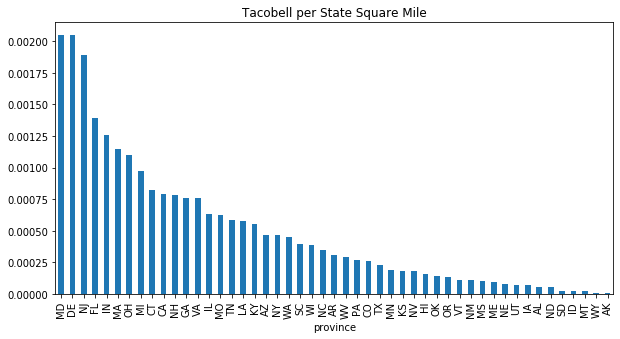

In [30]:
#Tacobell per square mile area of each state
grouped_tacobell_area = new_tacobell.groupby('province')['tacobell_per_sq_mile'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_tacobell_area.plot.bar(color = base_color)
plt.title('Tacobell per State Square Mile');

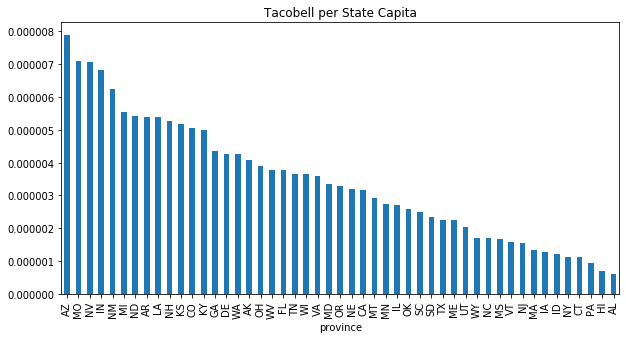

In [32]:
#Tacobell per capita of each state
grouped_tacobell_capita = new_tacobell.groupby('province')['tacobell_per_capita'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_tacobell_capita.plot.bar(color = base_color)
plt.title('Tacobell per State Capita');

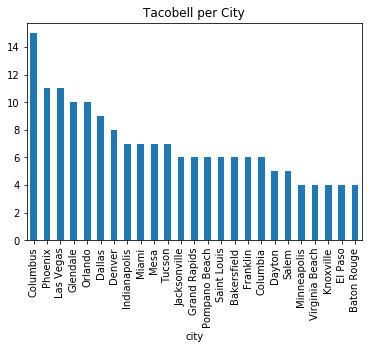

In [34]:
#City with the most Tacobell
top_tacobell_city = TacoBell.groupby('city')['city'].count().sort_values(ascending = False).head(25)
top_tacobell_city.plot.bar(color = base_color)
plt.title('Tacobell per City');

In [42]:
#Create US map with all Tacobell locations
taco_lat = TacoBell.latitude
taco_lon = TacoBell.longitude
taco_city = TacoBell.city

data = [
    go.Scattermapbox(
        lat=taco_lat,
        lon=taco_lon,
        mode='markers',
        marker=dict(
            size=5,
            color='rgb(0,150,255)',
            opacity=0.8
        ))]
layout = go.Layout(
    title='Tacobell Restaurants',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='Tacobell Restaurants')

# Conclusion

### McDonald's Summary:

1. McDonald's is dominating in terms of number in California, followed by Texas and Florida, making California the state with the most McDonald's.
2. However, in McDonald's per state square mile, California is far behind with Maryland and Massachusetts both leading in the first and second place. Meaning that McDonald's in these state are placed more closely together.
3. South Dakota has the most McDonald's per Capita while Kansas has the least.
4. From the map, it can be seen that McDonald's are spread out on the east rather than on the west

### Tacobell Summary:

1. Tacobell is dominating again in terms of number in California, followed by Florida and Texas, making California the state with the most Tacobell.
2. However, in McDonald's per state square mile, California is far behind with Maryland and Detroit both leading in the first and second place with almost the same amount.
3. Arizona has the most McDonald's per Capita while Alabama has the least.
4. From the map, again, it can be seen that McDonald's are spread out on the east rather than on the west